## Solving a regression problem using gradient descent

The purpose of this notebook is to illustrate how gradient descent works.

Import Numpy and Matplotlib components.

In [25]:
conda install ffmpeg

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\Anaconda3

  added / updated specs:
    - ffmpeg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         122 KB
    certifi-2020.6.20          |   py37haa95532_2         149 KB
    conda-4.9.1                |   py37haa95532_0         2.9 MB
    ffmpeg-4.2.2               |       he774522_0        17.6 MB
    ------------------------------------------------------------
                                           Total:        20.7 MB

The following NEW packages will be INSTALLED:

  ffmpeg             pkgs/main/win-64::ffmpeg-4.2.2-he774522_0

The following packages will be UPDATED:

  ca-certificates                               2020.7.22-0 --> 2020.10.14-0
  certifi                                  2020.6.20-py37_0 --> 2020.6.20-py37haa95532

In [15]:
import numpy as np
from matplotlib import pyplot as plt, animation, rc

Define the regression function.

In [16]:
def regression_function(alpha,beta,x): 
    return alpha+beta*x

Generate artificial data using the "true" values of the regression parameters.

In [17]:
number_of_observations = 50
beta_true = 6.0
alpha_true = 3.0
noise_standard_deviation = 0.25
x_data = np.random.random(number_of_observations)
y_data = (regression_function(alpha_true,beta_true,x_data)
          +noise_standard_deviation*np.random.randn(number_of_observations))

In [18]:
print(number_of_observations)
number_of_observations + 1


50


51

Plot the generated data. The setup of this figure is later used to create an animation of the optimization process.

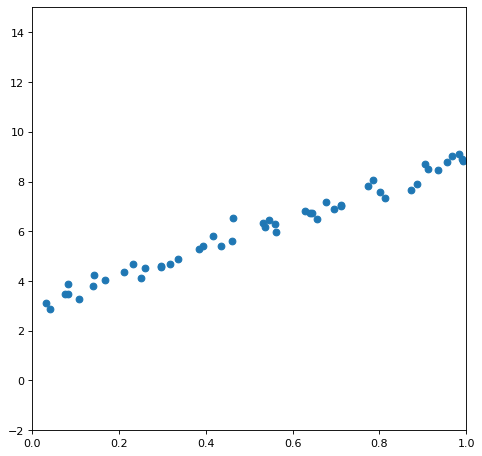

In [19]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x_data,y_data)
line_thickness = 2
line, = ax.plot([],[],lw=line_thickness)

Specify an initial guess for the regression parameter value.

In [20]:
alpha_initial_guess = 3.
beta_initial_guess = -2.

Choose a learning rate and an animation characteristic.

In [21]:
learning_rate = 0.01
number_of_gradient_descent_steps_per_frame = 20

Specify a function that performs a gradient descent step and a function used for creating an animation of the optimization process.

In [22]:
def gradient_descent_step():
    global alpha, beta
    y_predicted = regression_function(alpha,beta,x_data)
    derivative_of_loss_wrt_alpha = (2*(y_predicted-y_data)).mean()
    derivative_of_loss_wrt_beta = (2*x_data*(y_predicted-y_data)).mean()
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha
    beta = beta - learning_rate*derivative_of_loss_wrt_beta
    
def frame_evaluation(_):
    x_plotting = np.linspace(0,1,51)
    y_plotting = regression_function(alpha,beta,x_plotting)
    line.set_data(x_plotting,y_plotting)
    for _ in range(number_of_gradient_descent_steps_per_frame): 
        gradient_descent_step()
    return (line,)

Set up the animation.

In [23]:
rc('animation',html='html5')
number_of_frames = 250
frame_interval = 100
resulting_animation = animation.FuncAnimation(
    fig,frame_evaluation,np.arange(0,number_of_frames),interval=frame_interval)

Set the regression parameter values to the initial guesses. Run the optimization process, capture it as an animation, and display it in the notebook.

In [26]:
alpha = alpha_initial_guess
beta = beta_initial_guess
resulting_animation

Set the regression parameter values to the initial guesses. Run the optimization process, capture it as an animation, but this time save it as an mp4 file to the working directory.

In [26]:
alpha = alpha_initial_guess
beta = beta_initial_guess
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist=''), bitrate=1800)
resulting_animation.save('resulting_animation.mp4', writer=writer)

Optionally, open the saved animation.

In [24]:
!open 'resulting_animation.mp4'

In [12]:
print('Done.')

Done.
